## Random Forest Application

This is an application of a type of Machine Learning ensemble algorithm called Random Forest. 

Our dataset includes defining characteristics of fruit and the resulting label attached to each instance. For example, each instance (row) in the data table has information about 'height', 'width', 'mass', and 'color'. These features are our explanatory variables while the label (fruit names) are what we are going to try to predict for new instances. 

We begin by importing the python libraries we need for the analysis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In addition to the analytics packages in Python we need ScikitLearn library to conduct machine learning.

In [2]:
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

### Preparing the Dataset

Below we separate the dataset into training and test data. We build the ML algo using the training and test it on test set. The default split between training and test dataset is 75:25 in scikitlearn.

In [9]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.shape # returns a tuple representing the dimensionality of the fruits dataset
fruits.head(n=5) # to see the first 5 instances

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

The first model uses all 4 features to construct a classifier while the second uses 'height', and 'width' only. We compare these two models in the following cells. The following code builds the random forest for the first model.

### Random Forest

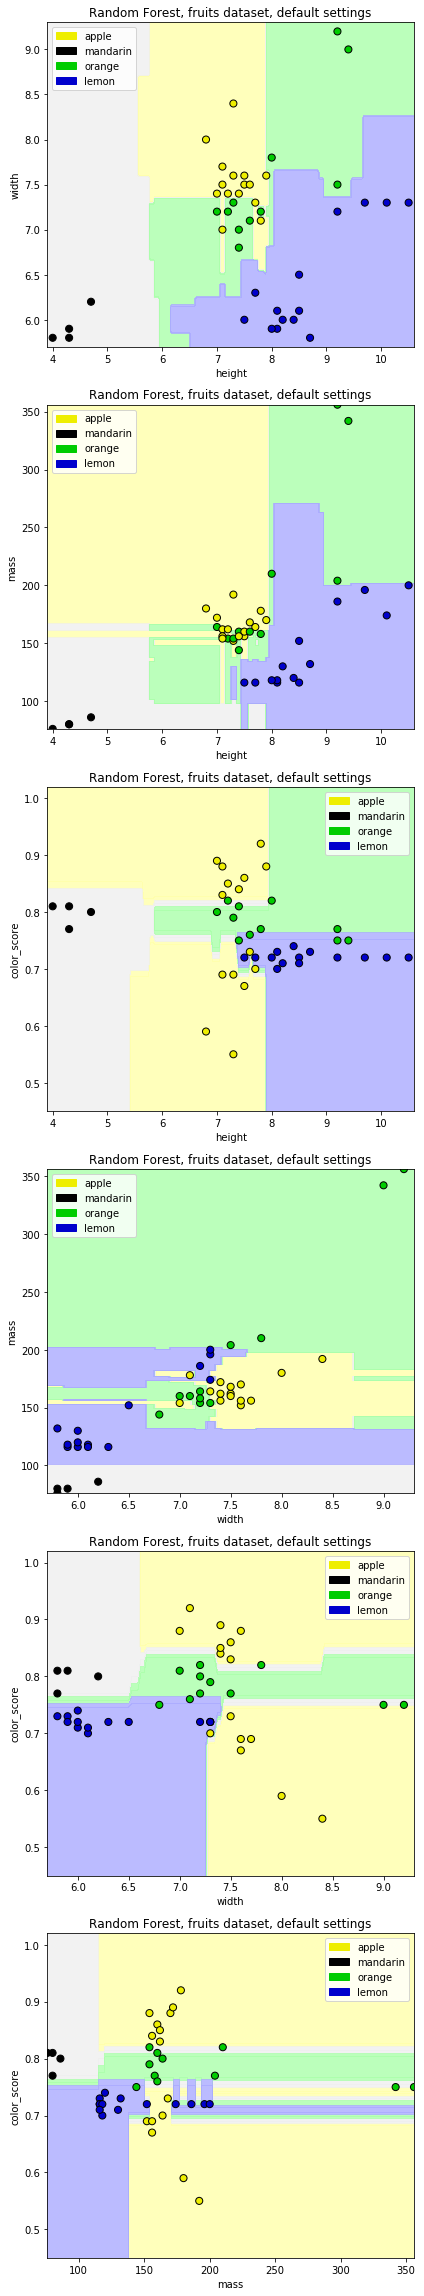

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(),
                                                   y_fruits.as_matrix(),
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Random Forest, fruits dataset, default settings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = RandomForestClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

Visually, we can see that our classifier does a pretty good job of categorizing test set instances across all our features

### Model Evaluation

In [10]:
clf = RandomForestClassifier(n_estimators = 10,
                            random_state=0).fit(X_train, y_train)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.80


The RF model has perfect performance on the training set but an accuracy of 0.80 in the test data. Accuracy, the default measure of algorithm performance is calculated thus:

**(TN+TP) / (TN+TP+FN+FP)**
where; 
*TN = True Negative
*TP = True Positive
*FN = False Negative
*FP = False Positive
